In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("uci breast cancer dataset (1).csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop(['id','Unnamed: 32'], axis='columns')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

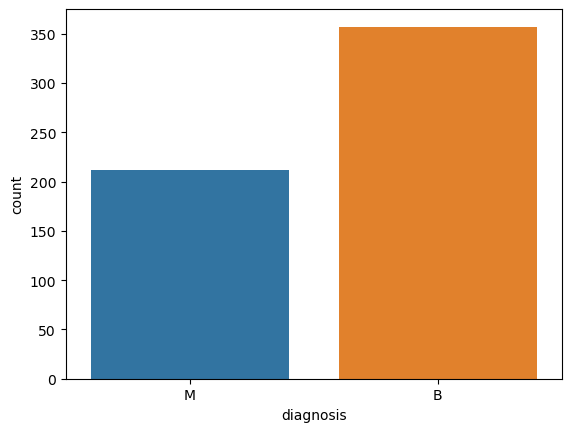

In [7]:
import seaborn as sns

sns.countplot(x='diagnosis', data=df)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

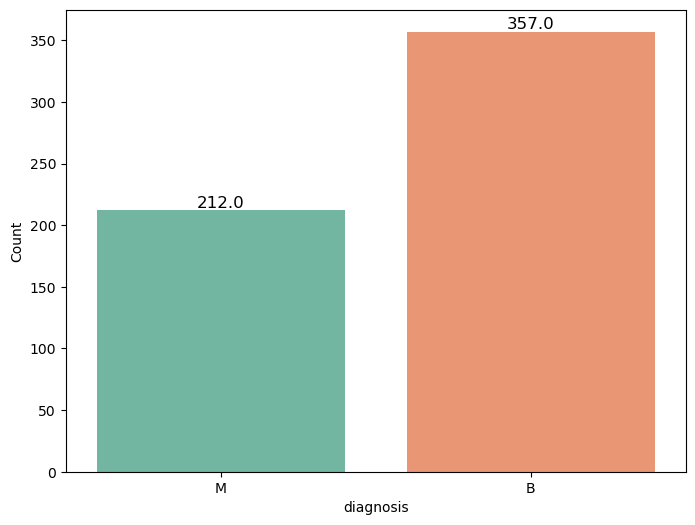

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2, height), ha='center',va='bottom', fontsize=12)

plt.ylabel('Count')
plt.show()

In [10]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [11]:
y.shape

(569,)

In [12]:
x.shape

(569, 30)

# Trian and Test Split

# 

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.7, random_state=42)

In [14]:
ytest

204    B
70     M
131    M
431    B
540    B
      ..
69     B
542    B
176    B
501    M
247    B
Name: diagnosis, Length: 171, dtype: object

In [15]:
ytest.shape

(171,)

In [16]:
xtest.shape

(171, 30)

# Step 3: Decission Tree model and evaluation

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain,ytrain)


DecisionTreeClassifier(random_state=42)

In [18]:
y_pred_dt = dt_model.predict(xtest)
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [19]:
dt_model.score(xtest,ytest)

0.9415204678362573

# Evaluate Decision Tree Model Performance

In [20]:
print('Decission Tree Model Perfomance')
print('Accuracy:',accuracy_score(ytest, y_pred_dt),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_dt))


Decission Tree Model Perfomance
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest Model and Evaluation

In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_rf = rf_model.predict(xtest)
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [23]:
rf_model.score(xtest, ytest)

0.9707602339181286

# Evaluate Random Forest model Perfomance

In [24]:
print('Random Forest Model Perfomance')
print('Accuracy:', accuracy_score(ytest, y_pred_rf),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_rf))

Random Forest Model Perfomance
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [25]:
print('Decission Tree Model Perfomance')
print('Accuracy:',accuracy_score(ytest, y_pred_dt),'\n')
print('Classification Report:')
print(classification_report(ytest, y_pred_dt))

Decission Tree Model Perfomance
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Pre-Tunning for Cost Complexity

In [26]:
#define hyperparameters for Decision Tree
dt_params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[None, 5,10,15,20,30],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}


#define hyperparameters for Random Forest
rf_params = {
    'n_estimators':[100,200.300],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[None, 5,10,15,20,30],
    'min_samples_split':[2,5,7,10],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
    
}

# Perform Grid Search for Decision Tree

In [27]:
 #cv=cross_validation

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                             param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'splitter': ['best', 'random']})

In [28]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00412817, 0.00178914, 0.00182624, ..., 0.00258436, 0.00367622,
        0.0019207 ]),
 'std_fit_time': array([0.0015578 , 0.00072952, 0.00091561, ..., 0.00176648, 0.00336683,
        0.00048222]),
 'mean_score_time': array([0.00138383, 0.00141759, 0.00097451, ..., 0.00096297, 0.00085664,
        0.00135589]),
 'std_score_time': array([8.74261722e-04, 5.82697747e-04, 4.77708021e-05, ...,
        8.20399779e-04, 4.40671118e-04, 5.85438984e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2',

In [29]:
tuning_result_dt_rs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004128,0.001558,0.001384,0.000874,gini,None,auto,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9000,0.9250,0.9500,0.911392,0.936709,0.924620,0.017729,432
1,0.001789,0.000730,0.001418,0.000583,gini,None,auto,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9000,0.9000,0.9750,0.962025,0.924051,0.932215,0.031182,90
2,0.001826,0.000916,0.000975,0.000048,gini,None,auto,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9250,0.9000,0.9500,0.911392,0.911392,0.919557,0.017159,725
3,0.002030,0.002487,0.000426,0.000851,gini,None,auto,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9125,0.9250,0.9000,0.924051,0.911392,0.914589,0.009223,1046
4,0.003265,0.004225,0.000703,0.001405,gini,None,auto,1,7,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9125,0.9000,0.9625,0.898734,0.911392,0.917025,0.023429,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.002055,0.000658,0.001061,0.000151,log_loss,30,log2,4,5,random,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.8375,0.9375,0.9375,0.898734,0.873418,0.896930,0.038418,1659
1724,0.003049,0.000856,0.001229,0.000399,log_loss,30,log2,4,7,best,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.9500,0.9000,0.8875,0.962025,0.924051,0.924715,0.028382,386
1725,0.002584,0.001766,0.000963,0.000820,log_loss,30,log2,4,7,random,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.8375,0.9375,0.9375,0.898734,0.873418,0.896930,0.038418,1659
1726,0.003676,0.003367,0.000857,0.000441,log_loss,30,log2,4,10,best,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.9375,0.9000,0.9250,0.962025,0.936709,0.932247,0.020133,76


In [30]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

# Perform Grid Search for Random 'Forest

In [31]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                             param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200.3]})

In [32]:
rf_grid_search.cv_results_

{'mean_fit_time': array([2.37192345e-01, 8.48484039e-04, 2.06106377e-01, ...,
        2.00462341e-04, 1.57906866e-01, 2.05898285e-04]),
 'std_fit_time': array([0.05243937, 0.00044814, 0.01099074, ..., 0.00040092, 0.03529335,
        0.0004118 ]),
 'mean_score_time': array([0.00740542, 0.        , 0.00655317, ..., 0.        , 0.00567937,
        0.        ]),
 'std_score_time': array([0.00211091, 0.        , 0.00140003, ..., 0.        , 0.00058888,
        0.        ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2',

In [33]:
tuning_result_rf = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.237192,0.052439,0.007405,0.002111,gini,None,auto,1,2,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.936709,0.924051,0.949652,0.018059,281
1,0.000848,0.000448,0.000000,0.000000,gini,None,auto,1,2,200.3,"{'criterion': 'gini', 'max_depth': None, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,865
2,0.206106,0.010991,0.006553,0.001400,gini,None,auto,1,5,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9750,0.936709,0.949367,0.949715,0.013841,133
3,0.000586,0.000480,0.000000,0.000000,gini,None,auto,1,5,200.3,"{'criterion': 'gini', 'max_depth': None, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,865
4,0.215067,0.015350,0.008476,0.002528,gini,None,auto,1,7,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9500,0.95,0.9750,0.949367,0.949367,0.954747,0.010131,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.000969,0.000042,0.000000,0.000000,log_loss,30,log2,4,5,200.3,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,865
1724,0.170197,0.020550,0.004924,0.000360,log_loss,30,log2,4,7,100,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.9500,0.95,0.9625,0.936709,0.936709,0.947184,0.009694,363
1725,0.000200,0.000401,0.000000,0.000000,log_loss,30,log2,4,7,200.3,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,865
1726,0.157907,0.035293,0.005679,0.000589,log_loss,30,log2,4,10,100,"{'criterion': 'log_loss', 'max_depth': 30, 'ma...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,224


In [34]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Evaluate the optimized models

In [35]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.935672514619883
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.95      0.95       108
           M       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [36]:
# Decision Tree and Grid Search
y_pred_dt_gs = rf_grid_search.predict(xtest)
print("\nRandom Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Random Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Hyperparameter Optimization using Randomized Search

In [37]:
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                     param_distributions=dt_params, n_iter=100, random_state=42)
dt_random_search.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [38]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00379415, 0.00356898, 0.00498667, 0.00523953, 0.00273967,
        0.00342989, 0.00200396, 0.00197825, 0.00512733, 0.00210528,
        0.0019845 , 0.00638504, 0.00264378, 0.00134239, 0.0021574 ,
        0.00212984, 0.00174146, 0.00179405, 0.00268693, 0.00229845,
        0.00222721, 0.00141497, 0.00229964, 0.00236135, 0.00221739,
        0.00196753, 0.00196958, 0.00180473, 0.00193233, 0.00226936,
        0.00223541, 0.00236807, 0.00401139, 0.00301232, 0.0056015 ,
        0.00200381, 0.00198307, 0.00165758, 0.00211811, 0.00194669,
        0.00286236, 0.00199108, 0.00220327, 0.00267153, 0.00224323,
        0.00465336, 0.00245214, 0.0023046 , 0.00290265, 0.0017561 ,
        0.00198002, 0.00270987, 0.00160222, 0.00174432, 0.0018209 ,
        0.00206246, 0.00167637, 0.00192814, 0.00208311, 0.00210009,
        0.00235195, 0.00196543, 0.00242786, 0.00305166, 0.00208259,
        0.0020093 , 0.00278273, 0.00212178, 0.00204463, 0.00246487,
        0.00215654, 0.00280485,

In [39]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003794,0.000436,0.002601,0.000487,random,10,3,auto,None,entropy,"{'splitter': 'random', 'min_samples_split': 10...",0.9125,0.8875,0.9250,0.974684,0.898734,0.919684,0.030264,37
1,0.003569,0.000741,0.002728,0.000684,random,2,3,sqrt,None,log_loss,"{'splitter': 'random', 'min_samples_split': 2,...",0.9000,0.8625,0.9125,0.936709,0.886076,0.899557,0.024912,95
2,0.004987,0.000371,0.002466,0.000554,best,7,3,sqrt,None,entropy,"{'splitter': 'best', 'min_samples_split': 7, '...",0.9125,0.9125,0.9375,0.911392,0.924051,0.919589,0.010084,43
3,0.005240,0.000561,0.002276,0.000424,best,5,4,sqrt,15,log_loss,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9375,0.9250,0.9375,0.924051,0.924051,0.929620,0.006443,9
4,0.002740,0.000885,0.002123,0.000637,random,10,2,auto,5,log_loss,"{'splitter': 'random', 'min_samples_split': 10...",0.9250,0.9125,0.9250,0.898734,0.924051,0.917057,0.010311,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002065,0.000354,0.001316,0.000422,best,10,4,log2,30,log_loss,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9375,0.9000,0.9250,0.962025,0.936709,0.932247,0.020133,5
96,0.001758,0.000393,0.001100,0.000471,random,10,2,sqrt,30,gini,"{'splitter': 'random', 'min_samples_split': 10...",0.9000,0.9125,0.9250,0.924051,0.848101,0.901930,0.028406,93
97,0.002154,0.000481,0.001356,0.000444,best,10,3,sqrt,20,gini,"{'splitter': 'best', 'min_samples_split': 10, ...",0.8875,0.9000,0.9750,0.924051,0.924051,0.922120,0.029972,31
98,0.001818,0.000330,0.001181,0.000421,random,5,2,log2,None,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9125,0.9125,0.9125,0.924051,0.911392,0.914589,0.004750,69


In [40]:
dt_random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'log_loss'}

In [41]:
#Random Search

In [42]:
rf_random_search = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42),
                                     param_distributions = rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200.3]},
                   random_state=42)

In [43]:
rf_random_search.cv_results_
tuning_results_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_results_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001019,0.000031,0.000000,0.000000,200.3,10,3,auto,None,entropy,"{'n_estimators': 200.3, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
1,0.000203,0.000406,0.000000,0.000000,200.3,2,3,sqrt,None,log_loss,"{'n_estimators': 200.3, 'min_samples_split': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
2,0.157465,0.008923,0.006674,0.002650,100,7,3,sqrt,None,entropy,"{'n_estimators': 100, 'min_samples_split': 7, ...",0.9625,0.9375,0.9625,0.949367,0.936709,0.949715,0.011361,9
3,0.179570,0.015986,0.006585,0.001801,100,5,4,sqrt,15,log_loss,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.9625,0.9375,0.9625,0.949367,0.924051,0.947184,0.014852,24
4,0.000222,0.000443,0.000000,0.000000,200.3,10,2,auto,5,log_loss,"{'n_estimators': 200.3, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.144455,0.012335,0.006508,0.002060,100,10,4,log2,30,log_loss,"{'n_estimators': 100, 'min_samples_split': 10,...",0.9625,0.9500,0.9625,0.936709,0.936709,0.949684,0.011535,15
96,0.000401,0.000491,0.000000,0.000000,200.3,10,2,sqrt,30,gini,"{'n_estimators': 200.3, 'min_samples_split': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
97,0.150768,0.018329,0.006485,0.003861,100,10,3,sqrt,20,gini,"{'n_estimators': 100, 'min_samples_split': 10,...",0.9500,0.9375,0.9500,0.936709,0.949367,0.944715,0.006223,38
98,0.000028,0.000056,0.000000,0.000000,200.3,5,2,log2,None,entropy,"{'n_estimators': 200.3, 'min_samples_split': 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55


# Evaluate the optimized models for Randomized Search

In [44]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9005847953216374
Classification Report:
              precision    recall  f1-score   support

           B       0.91      0.94      0.92       108
           M       0.88      0.84      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [45]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [48]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42, splitter='random')

# Post Pruning For Decision Tree

[Text(0.4166666666666667, 0.9642857142857143, 'concave points_mean <= 0.04\nlog_loss = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.2, 0.8928571428571429, 'fractal_dimension_mean <= 0.058\nlog_loss = 0.248\nsamples = 218\nvalue = [209, 9]'),
 Text(0.06666666666666667, 0.8214285714285714, 'radius_worst <= 13.725\nlog_loss = 0.497\nsamples = 55\nvalue = [49, 6]'),
 Text(0.03333333333333333, 0.75, 'log_loss = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.1, 0.75, 'radius_worst <= 17.382\nlog_loss = 0.592\nsamples = 42\nvalue = [36, 6]'),
 Text(0.06666666666666667, 0.6785714285714286, 'area_worst <= 636.035\nlog_loss = 0.303\nsamples = 37\nvalue = [35, 2]'),
 Text(0.03333333333333333, 0.6071428571428571, 'log_loss = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.1, 0.6071428571428571, 'texture_mean <= 19.831\nlog_loss = 0.414\nsamples = 24\nvalue = [22, 2]'),
 Text(0.06666666666666667, 0.5357142857142857, 'log_loss = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.13333333333333333, 0.

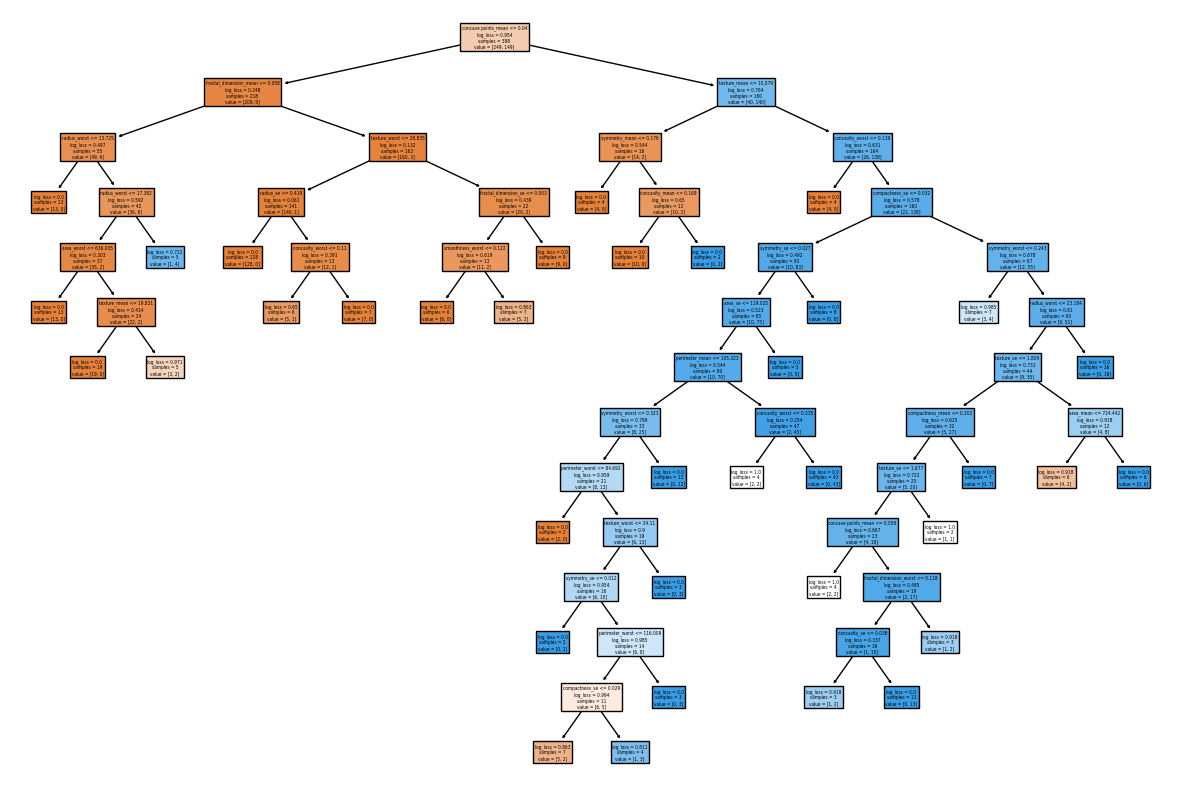

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names=x.columns)

In [51]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [52]:
ccp_alpha_values 

array([0.        , 0.00297998, 0.00410705, 0.00413914, 0.00455665,
       0.00492511, 0.0051598 , 0.00763271, 0.00800266, 0.00817768,
       0.00857312, 0.00957204, 0.01092592, 0.01480987, 0.02770376,
       0.06384186, 0.47242814])

In [53]:
clfs_list = []  # save diffrent classifiers

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [54]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002979979390176378, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004107052366744421, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0041391352975969145, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0045566453923453236, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004925112047651968, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.005159798232010443, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.007632708862444167, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008002658244879361, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008177683784198718, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008573123638279622, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.009572040823236913, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010925918456273295, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014809868775817673, random_state

In [55]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [56]:
train_scores

[1.0,
 0.9949748743718593,
 0.992462311557789,
 0.992462311557789,
 0.992462311557789,
 0.9899497487437185,
 0.9899497487437185,
 0.9874371859296482,
 0.9874371859296482,
 0.9824120603015075,
 0.9824120603015075,
 0.9824120603015075,
 0.9698492462311558,
 0.9597989949748744,
 0.9396984924623115,
 0.9246231155778895,
 0.6256281407035176]

In [57]:
test_scores 

[0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9415204678362573,
 0.9064327485380117,
 0.8947368421052632,
 0.631578947368421]

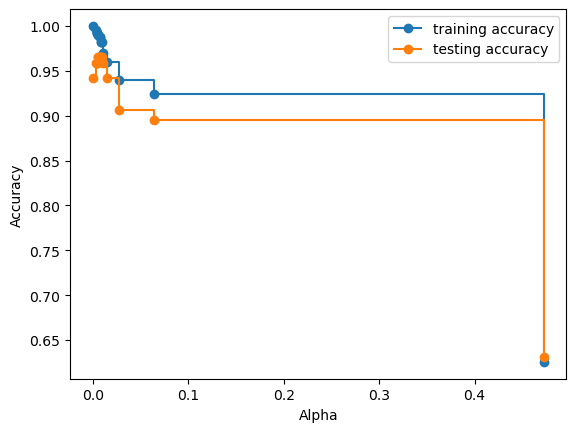

In [58]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [59]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [60]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

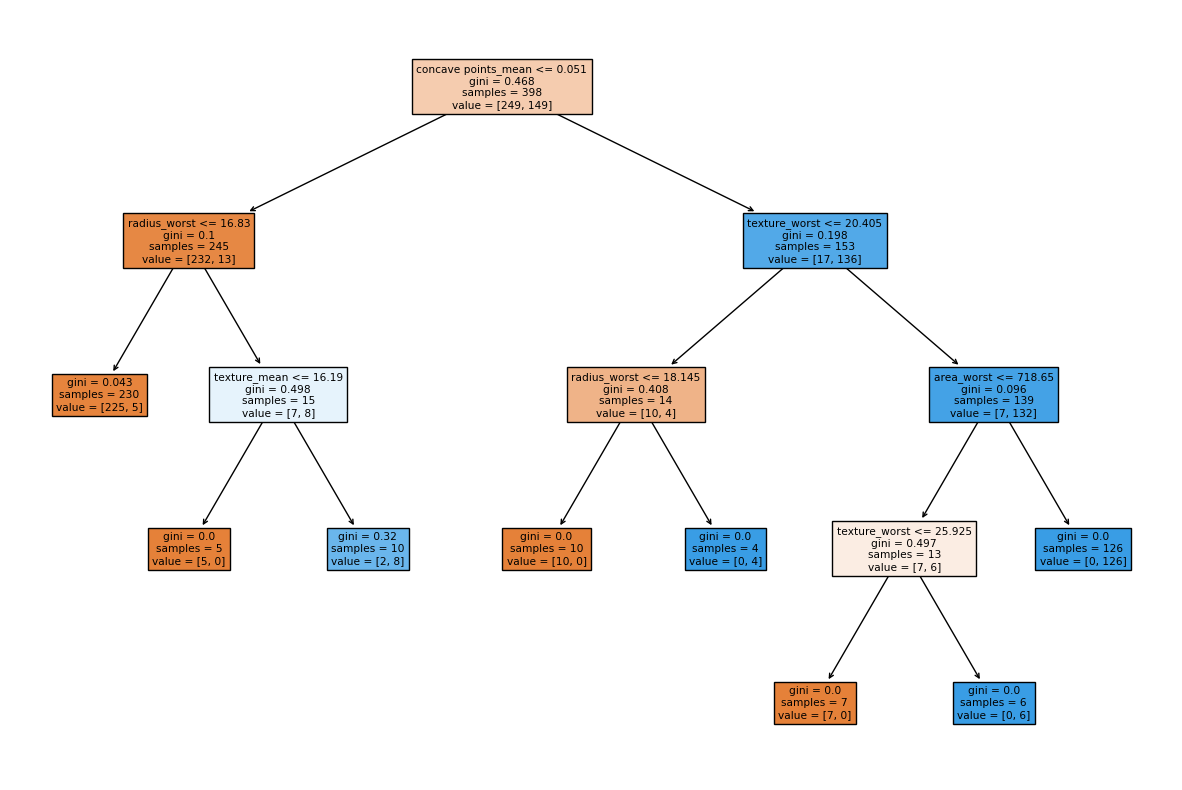

In [61]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)